# Illustration of prior and posterior Gaussian process for different kernels
- 서로 다른 커널을 가진 `GaussianProcessRegressor`의 prior 분포와 posterior 분포

## Helper function

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:



def plot_gpr_samples(gpr_model, n_samples, ax):
    """가우스 프로세스 모델에서 추출된 샘플을 그리기

    만약 가우시안 프로세스 모델이 훈련되지 않았다면, 추출된 샘플은 사전 분포에서 추출된다. 
    그렇지 않으면, 샘플은 사후 분포에서 추출된다. 여기서 샘플은 함수에 해당한다.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    n_samples : int
        가우시안 프로세스 분포에서 추출할 샘플의 수
    ax : matplotlib axis
        샘플을 플로팅할 matplotlib 축
    """
    x = np.linspace(0, 5, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.7,
            label=f"Sampled function #{idx + 1}",
        )
    ax.plot(x, y_mean, color="black", label="Mean")
    ax.fill_between(
        x,
        y_mean - y_std,
        y_mean + y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_ylim([-3, 3])

## Dataset and Gaussian process generation

In [3]:
rng = np.random.RandomState(4)
X_train = rng.uniform(0, 5, 10).reshape(-1, 1)
y_train = np.sin((X_train[:, 0] - 2.5) ** 2)
n_samples = 5

## Kernel cookbook

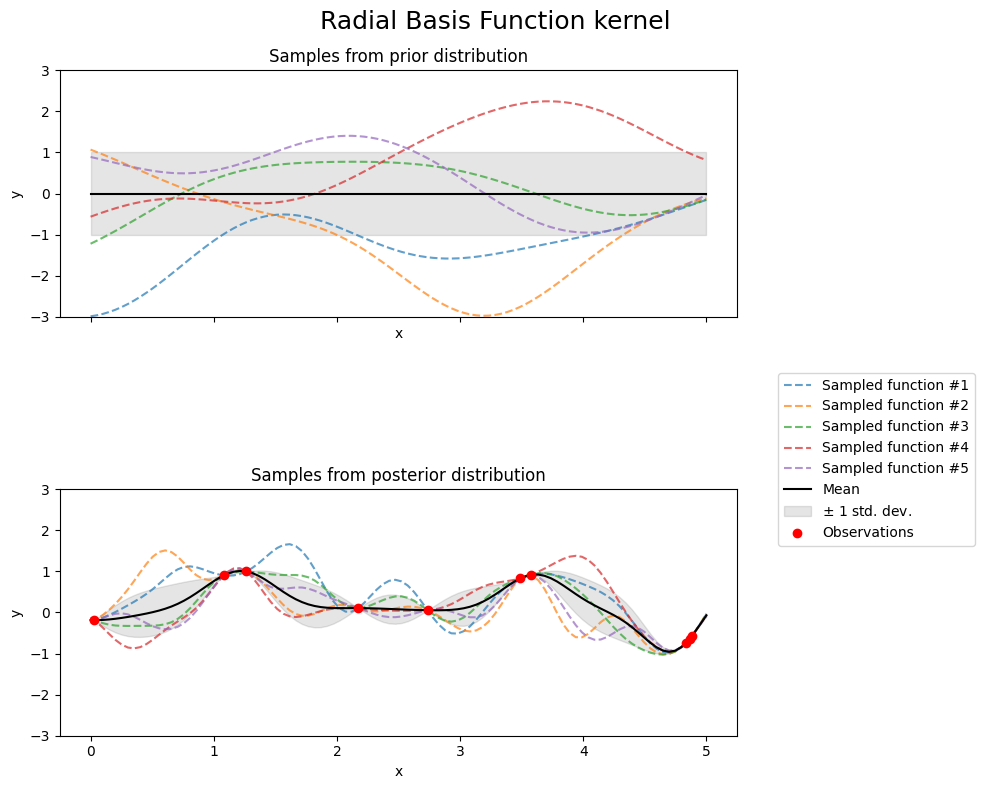

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

# prior 그리기
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
axs[0].set_title("Samples from prior distribution")

# posterior 그리기
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X_train[:, 0], y_train, color="red", zorder=10, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")

fig.suptitle("Radial Basis Function kernel", fontsize=18)
plt.tight_layout()

In [5]:
print(f"Kernel parameters before fit:\n{kernel})")
print(
    f"Kernel parameters after fit: \n{gpr.kernel_} \n"
    f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}"
)

Kernel parameters before fit:
1**2 * RBF(length_scale=1))
Kernel parameters after fit: 
0.594**2 * RBF(length_scale=0.279) 
Log-likelihood: -0.067


### Rational Quadradtic kernel

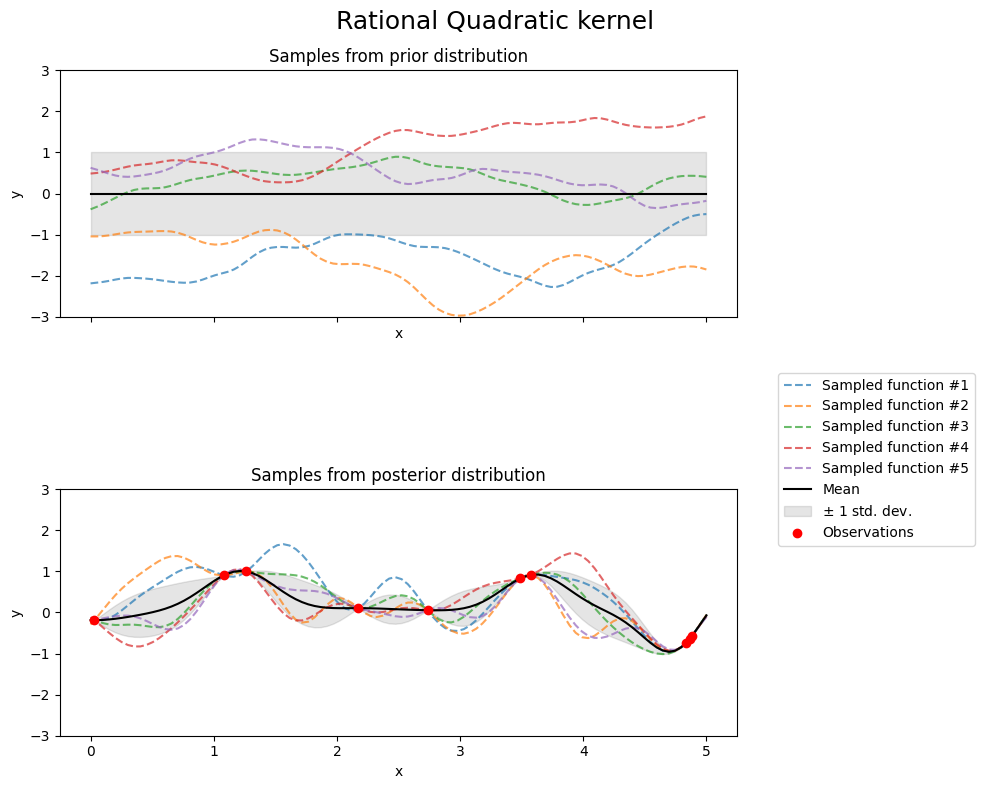

In [6]:
from sklearn.gaussian_process.kernels import RationalQuadratic

kernel = 1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1, alpha_bounds=(1e-5, 1e15))
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

# prior 그리기
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
axs[0].set_title("Samples from prior distribution")

# posterior 그리기
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X_train[:, 0], y_train, color="red", zorder=10, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")

fig.suptitle("Rational Quadratic kernel", fontsize=18)
plt.tight_layout()

In [7]:
print(f"Kernel parameters before fit:\n{kernel})")
print(
    f"Kernel parameters after fit: \n{gpr.kernel_} \n"
    f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}"
)

Kernel parameters before fit:
1**2 * RationalQuadratic(alpha=0.1, length_scale=1))
Kernel parameters after fit: 
0.594**2 * RationalQuadratic(alpha=3.33e+06, length_scale=0.279) 
Log-likelihood: -0.067


### Exp-Sine-Squared kernel

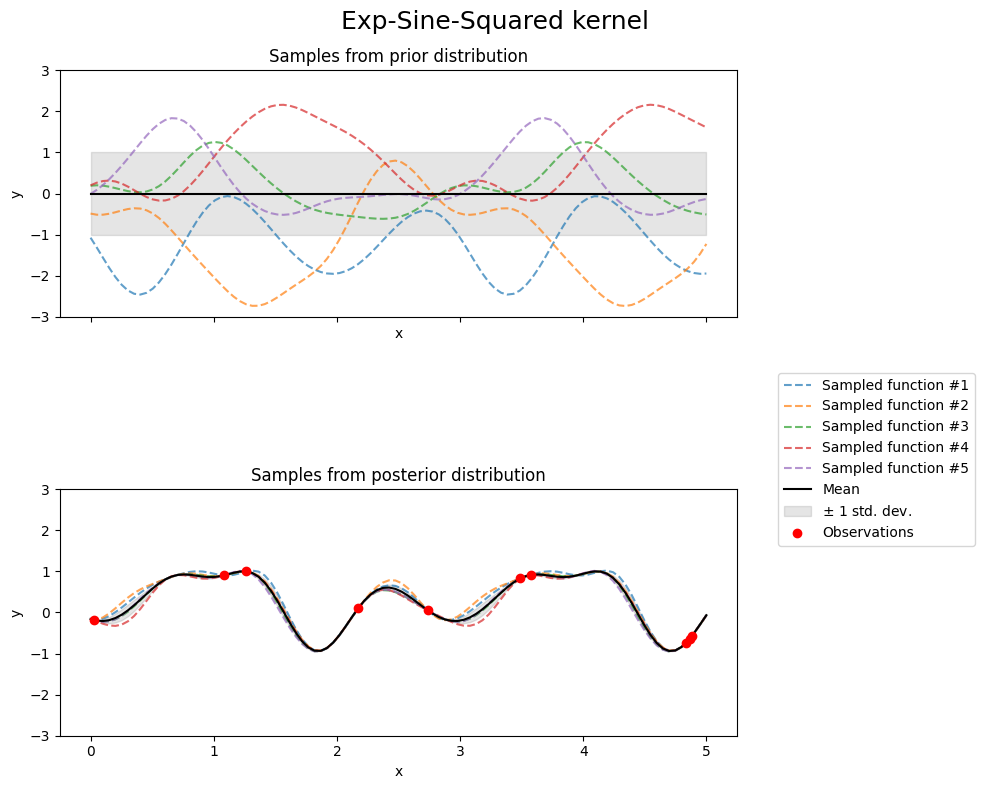

In [8]:
from sklearn.gaussian_process.kernels import ExpSineSquared

kernel = 1.0 * ExpSineSquared(
    length_scale=1.0,
    periodicity=3.0,
    length_scale_bounds=(0.1, 10.0),
    periodicity_bounds=(1.0, 10.0),
)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

# prior 그리기
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
axs[0].set_title("Samples from prior distribution")

# posterior 그리기
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X_train[:, 0], y_train, color="red", zorder=10, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")

fig.suptitle("Exp-Sine-Squared kernel", fontsize=18)
plt.tight_layout()

In [9]:
print(f"Kernel parameters before fit:\n{kernel})")
print(
    f"Kernel parameters after fit: \n{gpr.kernel_} \n"
    f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}"
)

Kernel parameters before fit:
1**2 * ExpSineSquared(length_scale=1, periodicity=3))
Kernel parameters after fit: 
0.799**2 * ExpSineSquared(length_scale=0.791, periodicity=2.87) 
Log-likelihood: 3.394


### Dot-product kernel

c:\Users\Cal-01\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


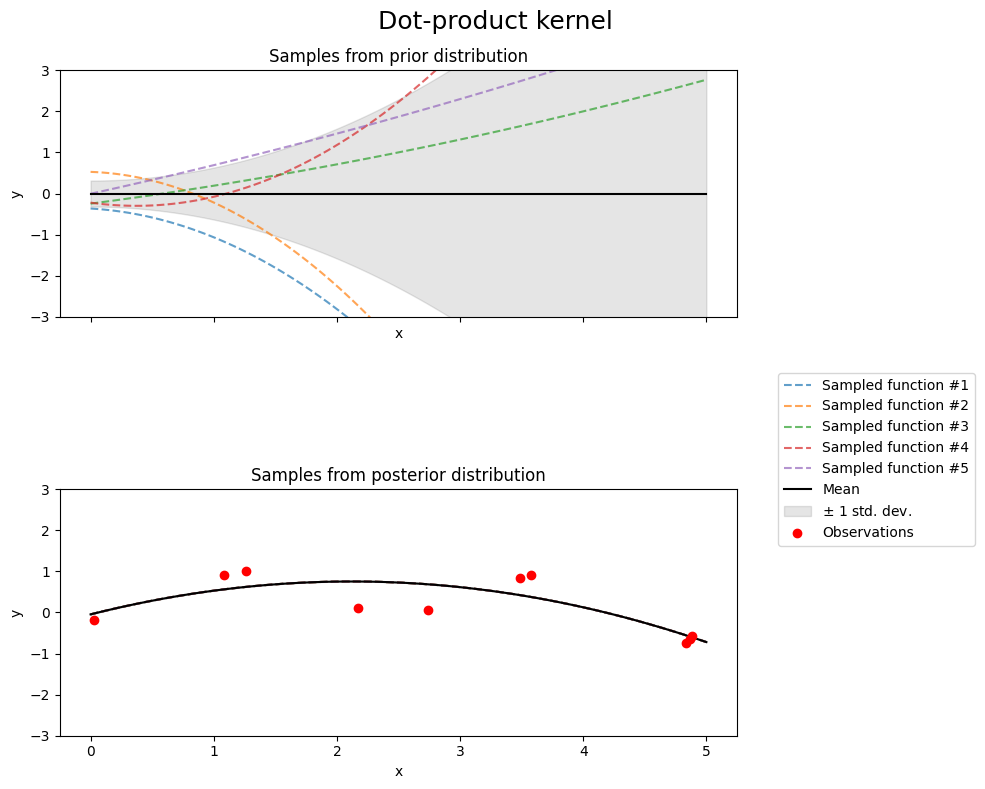

In [10]:
from sklearn.gaussian_process.kernels import ConstantKernel, DotProduct

kernel = ConstantKernel(0.1, (0.01, 10.0)) * (
    DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2
)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

# prior 그리기
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
axs[0].set_title("Samples from prior distribution")

# posterior 그리기
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X_train[:, 0], y_train, color="red", zorder=10, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")

fig.suptitle("Dot-product kernel", fontsize=18)
plt.tight_layout()

In [11]:
print(f"Kernel parameters before fit:\n{kernel})")
print(
    f"Kernel parameters after fit: \n{gpr.kernel_} \n"
    f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}"
)

Kernel parameters before fit:
0.316**2 * DotProduct(sigma_0=1) ** 2)
Kernel parameters after fit: 
0.708**2 * DotProduct(sigma_0=0.446) ** 2 
Log-likelihood: -7959966250.776


### Matern kernel

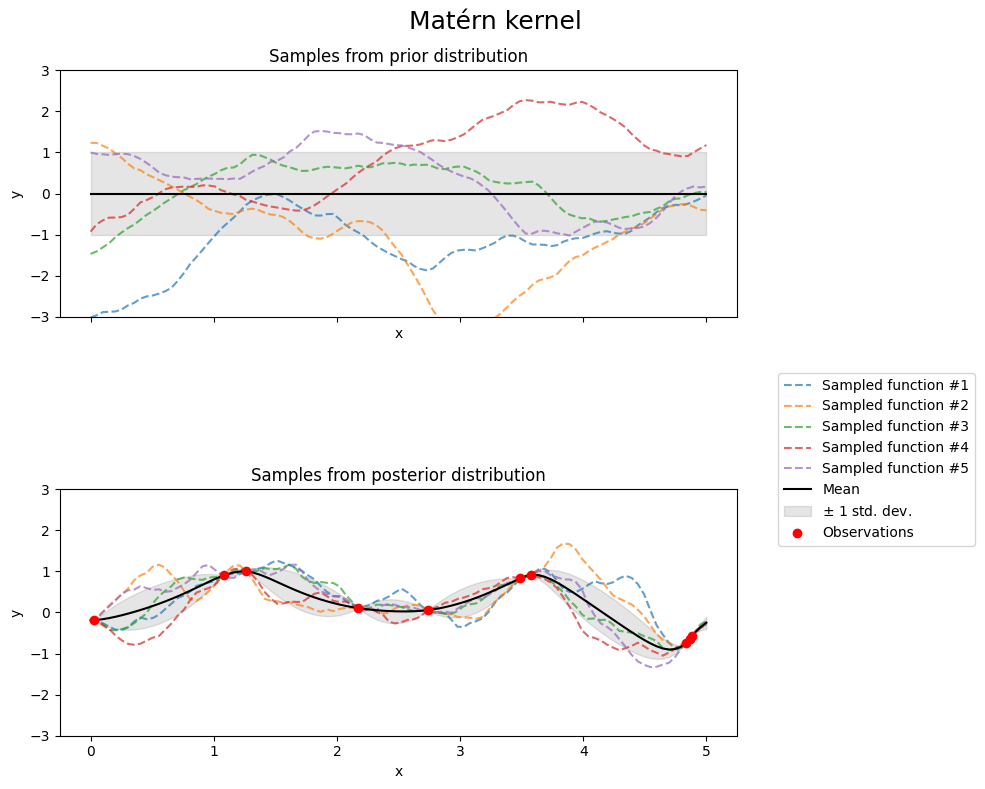

In [12]:
from sklearn.gaussian_process.kernels import Matern

kernel = 1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0), nu=1.5)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

# prior 그리기
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
axs[0].set_title("Samples from prior distribution")

# posterior 그리기
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X_train[:, 0], y_train, color="red", zorder=10, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")

fig.suptitle("Matérn kernel", fontsize=18)
plt.tight_layout()

In [13]:
print(f"Kernel parameters before fit:\n{kernel})")
print(
    f"Kernel parameters after fit: \n{gpr.kernel_} \n"
    f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}"
)

Kernel parameters before fit:
1**2 * Matern(length_scale=1, nu=1.5))
Kernel parameters after fit: 
0.609**2 * Matern(length_scale=0.484, nu=1.5) 
Log-likelihood: -1.185
